In [1]:
!ls /kaggle/input/flir-thermal-images-dataset/FLIR_ADAS_1_3/train

Annotated_thermal_8_bit  thermal_16_bit  thermal_annotations.json
RGB			 thermal_8_bit


In [3]:
import json
with open('/kaggle/input/flir-thermal-images-dataset/FLIR_ADAS_1_3/train/thermal_annotations.json', 'r') as f:
    annotations = json.load(f)

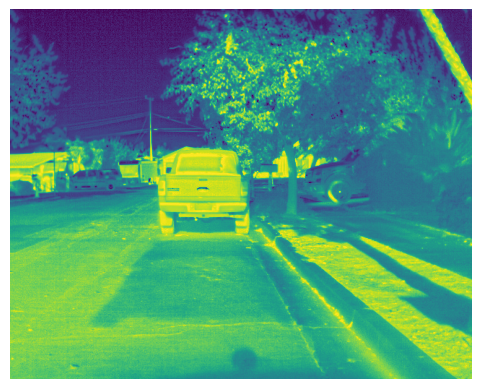

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image = Image.open("/kaggle/input/flir-thermal-images-dataset/FLIR_ADAS_1_3/train/thermal_8_bit/FLIR_00001.jpeg")

image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()


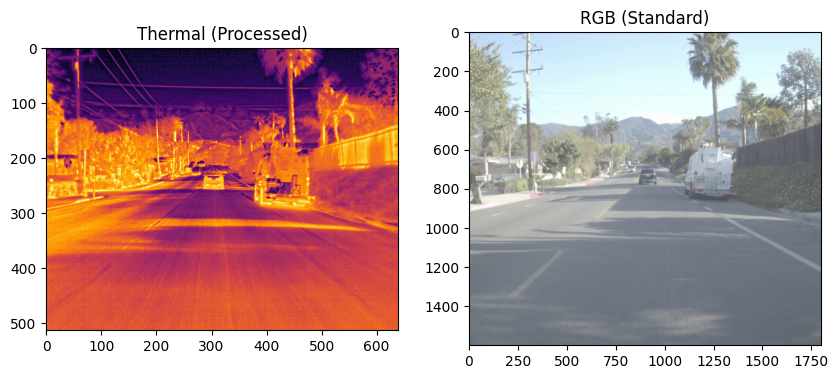

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_pair(thermal_path, rgb_path):
    thermal_raw = cv2.imread(thermal_path, cv2.IMREAD_ANYDEPTH)
    
    thermal_norm = (thermal_raw - thermal_raw.min()) / (thermal_raw.max() - thermal_raw.min()) * 255.0
    thermal_img = thermal_norm.astype(np.uint8) 

    rgb_raw = cv2.imread(rgb_path)
    rgb_img = cv2.cvtColor(rgb_raw, cv2.COLOR_BGR2RGB) 
    rgb_img = rgb_img.astype(np.uint8) 

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0].imshow(thermal_img, cmap='inferno')
    ax[0].set_title("Thermal (Processed)")
    
    ax[1].imshow(rgb_img)
    ax[1].set_title("RGB (Standard)")
    
    plt.show()

show_pair(
    "/kaggle/input/flir-thermal-images-dataset/FLIR_ADAS_1_3/train/thermal_8_bit/FLIR_00009.jpeg", 
    "/kaggle/input/flir-thermal-images-dataset/FLIR_ADAS_1_3/train/RGB/FLIR_00009.jpg"
)

In [ ]:
import os
import shutil
import cv2
import numpy as np
from tqdm import tqdm # Progress bar


SRC_RGB_DIR = '/kaggle/input/flir-thermal-images-dataset/FLIR_ADAS_1_3/train/RGB/'
SRC_THERMAL_DIR = '/kaggle/input/flir-thermal-images-dataset/FLIR_ADAS_1_3/train/thermal_8_bit/'

DEST_BASE = '/kaggle/working/clean_dataset_2k/'
DEST_RGB_DIR = os.path.join(DEST_BASE, 'RGB')
DEST_THERMAL_DIR = os.path.join(DEST_BASE, 'thermal_8_bit')

TARGET_COUNT = 2000

# remove images with glare
GLARE_MEAN_THRESH = 200
GLARE_STD_THRESH = 15

def create_dirs():
    os.makedirs(DEST_RGB_DIR, exist_ok=True)
    os.makedirs(DEST_THERMAL_DIR, exist_ok=True)
    print(f"Created directories at: {DEST_BASE}")

def is_valid_image(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None:
            return False, "Read Error"
        
        mean_val = np.mean(img)
        std_val = np.std(img)
        
        if mean_val > GLARE_MEAN_THRESH and std_val < GLARE_STD_THRESH:
            return False, f"Glare Detected (Mean: {mean_val:.2f}, Std: {std_val:.2f})"
            
        return True, "Valid"
    except Exception as e:
        return False, f"Exception: {e}"

def process_dataset():
    create_dirs()
    
    rgb_files = sorted([f for f in os.listdir(SRC_RGB_DIR) if f.endswith('.jpg')])
    
    saved_count = 0
    skipped_count = 0
        
    for rgb_file in tqdm(rgb_files):
        if saved_count >= TARGET_COUNT:
            break
            
        rgb_path = os.path.join(SRC_RGB_DIR, rgb_file)
        
        valid, msg = is_valid_image(rgb_path)
        
        if not valid:
            skipped_count += 1
            continue
            
        file_id = os.path.splitext(rgb_file)[0]
        thermal_filename = file_id + ".jpeg" 
        thermal_path = os.path.join(SRC_THERMAL_DIR, thermal_filename)
        
        if not os.path.exists(thermal_path):
             thermal_path = os.path.join(SRC_THERMAL_DIR, file_id + ".jpg")
        
        if os.path.exists(thermal_path):
            shutil.copy(rgb_path, os.path.join(DEST_RGB_DIR, rgb_file))
            shutil.copy(thermal_path, os.path.join(DEST_THERMAL_DIR, thermal_filename))
            
            saved_count += 1
        else:
            print(f"Warning: Missing thermal pair for {rgb_file}")
            skipped_count += 1

    print("-" * 30)
    print(f"Total Saved: {saved_count}")
    print(f"Total Skipped (Glare/Error): {skipped_count}")

if __name__ == "__main__":
    process_dataset()

In [ ]:
import shutil
import os

source_folder = '/kaggle/working/clean_dataset_2k'
output_filename = '/kaggle/working/flir_clean_2k'

shutil.make_archive(output_filename, 'zip', source_folder)

In [ ]:
import gdown
import zipfile

url = f"https://drive.google.com/uc?id=1BJqn1s7J2LAMDenQ7FaORrcueAEvpm0K"

output = "dataset.zip"
gdown.download(url, output, quiet=False)

with zipfile.ZipFile(output, "r") as z:
    z.extractall("dataset")

In [7]:
annotations['annotations'][0]

{'image_id': 0,
 'extra_info': {'human_annotated': True},
 'category_id': 3,
 'iscrowd': 0,
 'id': 1,
 'segmentation': [[202, 190, 202, 312, 334, 312, 334, 190]],
 'bbox': [202, 190, 132, 122],
 'area': 16104}

In [8]:
annotations['categories']

[{'name': 'person', 'id': 1, 'supercategory': 'unknown'},
 {'name': 'bicycle', 'id': 2, 'supercategory': 'unknown'},
 {'name': 'car', 'id': 3, 'supercategory': 'unknown'},
 {'name': 'motorcycle', 'id': 4, 'supercategory': 'unknown'},
 {'name': 'airplane', 'id': 5, 'supercategory': 'unknown'},
 {'name': 'bus', 'id': 6, 'supercategory': 'unknown'},
 {'name': 'train', 'id': 7, 'supercategory': 'unknown'},
 {'name': 'truck', 'id': 8, 'supercategory': 'unknown'},
 {'name': 'boat', 'id': 9, 'supercategory': 'unknown'},
 {'name': 'traffic light', 'id': 10, 'supercategory': 'unknown'},
 {'name': 'fire hydrant', 'id': 11, 'supercategory': 'unknown'},
 {'name': 'stop sign', 'id': 12, 'supercategory': 'unknown'},
 {'name': 'parking meter', 'id': 13, 'supercategory': 'unknown'},
 {'name': 'bench', 'id': 14, 'supercategory': 'unknown'},
 {'name': 'bird', 'id': 15, 'supercategory': 'unknown'},
 {'name': 'cat', 'id': 16, 'supercategory': 'unknown'},
 {'name': 'dog', 'id': 17, 'supercategory': 'unknow

In [9]:
categories = {}
for x in annotations['categories']:
    categories[x['id']] = x['name']

In [11]:
import os
from datasets import Dataset, Features, Image as HFImage, Value

thermal_dir = "dataset/thermal_8_bit"
rgb_dir = "dataset/RGB"

names = sorted([
    f for f in os.listdir(thermal_dir)
    if f.lower().endswith((".png", ".jpg", ".jpeg"))
])[:1250]

In [12]:
names[-1]

'FLIR_01402.jpeg'

In [13]:
def get_image_id(name):
    return int(name.strip('.jpeg').strip('FLIR_').lstrip('0'))

In [14]:
from collections import defaultdict
id_to_categories = defaultdict(lambda: defaultdict(int))

for x in annotations['annotations']:
    id_to_categories[x['image_id']][categories[x['category_id']]] += 1

In [15]:
def generate_prompt(objects_dict):
    objects = dict(objects_dict) if objects_dict else {}
    
    parts = []
    
    for obj, count in sorted(objects.items(), key=lambda x: x[1], reverse=True):
        if obj == 'person':
            if count == 1:
                parts.append("a person")
            elif count == 2:
                parts.append("two people")
            elif count <= 5:
                parts.append("several people")
            else:
                parts.append("many people")
        else:
            if count == 1:
                parts.append(f"a {obj}")
            elif count == 2:
                parts.append(f"two {obj}s")
            elif count <= 5:
                parts.append(f"several {obj}s")
            else:
                parts.append(f"many {obj}s")
    
    if len(parts) == 0:
        return "outdoor road scene with trees"
    elif len(parts) == 1:
        return f"outdoor road scene with trees and {parts[0]}"
    elif len(parts) == 2:
        return f"outdoor road scene with trees, {parts[0]}, and {parts[1]}"
    else:
        return f"outdoor road scene with trees, {', '.join(parts[:-1])}, and {parts[-1]}"

image_prompts = {}
for img_id, objects in id_to_categories.items():
    prompt = generate_prompt(objects)
    image_prompts[img_id] = prompt
    if img_id < 10:
        print(f"{img_id}: {prompt}")


0: outdoor road scene with trees and several cars
1: outdoor road scene with trees and many cars
2: outdoor road scene with trees and several cars
3: outdoor road scene with trees, many cars, and a person
4: outdoor road scene with trees and many cars
5: outdoor road scene with trees and two cars
6: outdoor road scene with trees and two cars
7: outdoor road scene with trees and several cars
8: outdoor road scene with trees and several cars
9: outdoor road scene with trees, many cars, and a person


In [16]:
image_prompts[332]

'outdoor road scene with trees, several cars, several people, and several bicycles'

In [17]:
from huggingface_hub import login
login(token="---")

In [18]:
def gen():
    for idx, fname in enumerate(names):
        thermal_path = os.path.join(thermal_dir, fname)
        rgb_path = os.path.join(rgb_dir, fname).replace(".jpeg", ".jpg")

        try:
            prompt = image_prompts[get_image_id(fname)]
        except KeyError:
            prompt = "outdoor road scene with trees"
        
        yield {
            "conditioning_image": thermal_path,
            "image": rgb_path,
            "prompt": prompt,
        }

features = Features({
    "conditioning_image": HFImage(),
    "image": HFImage(),
    "prompt": Value("string"),
})

dataset = Dataset.from_generator(gen, features=features)


Generating train split: 0 examples [00:00, ? examples/s]

In [19]:
dataset.push_to_hub("swetha3456/thermal-rgb-dataset-v3")

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ? shards/s]

Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Map:   0%|          | 0/625 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

CommitInfo(commit_url='https://huggingface.co/datasets/swetha3456/thermal-rgb-dataset-v3/commit/2567a153a6531d5bab42d6a7678f5759ec64111d', commit_message='Upload dataset', commit_description='', oid='2567a153a6531d5bab42d6a7678f5759ec64111d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/swetha3456/thermal-rgb-dataset-v3', endpoint='https://huggingface.co', repo_type='dataset', repo_id='swetha3456/thermal-rgb-dataset-v3'), pr_revision=None, pr_num=None)

In [ ]:
!pip install --upgrade pyarrow datasets

In [ ]:
!pip install controlnet_aux

In [ ]:
# preprocessing for control signal 2

from controlnet_aux import HEDdetector
import cv2
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

def preprocess_dual_channel_rgb(thermal_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    hed = HEDdetector.from_pretrained('lllyasviel/Annotators')
    
    for fname in tqdm(names):
        if not fname.endswith(('.jpg', '.jpeg', '.png')):
            continue
            
        thermal_path = os.path.join(thermal_dir, fname)
        thermal = cv2.imread(thermal_path)
        
        # CLAHE channel
        gray = cv2.cvtColor(thermal, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        clahe_channel = clahe.apply(gray)
        
        # HED channel
        thermal_pil = Image.fromarray(cv2.cvtColor(thermal, cv2.COLOR_BGR2RGB))
        hed_output = hed(thermal_pil).convert('L')  # Grayscale edges
        hed_channel = np.array(hed_output)
        
        # Combine into RGB
        conditioning_rgb = np.stack([
            clahe_channel,   # R: thermal texture
            hed_channel,     # G: edges
            np.clip(clahe_channel + hed_channel, 0, 255).astype(np.uint8) // 2  # B: combined
        ], axis=-1)
        
        output_path = os.path.join(output_dir, fname)
        Image.fromarray(conditioning_rgb).save(output_path)
    

preprocess_dual_channel_rgb(
    thermal_dir="dataset/thermal_8_bit",
    output_dir="dataset/thermal_clahe_hed"
)